In [ ]:
import pandas as pd
# Loading the cleaned data
df = pd.read_csv('/content/laptop_dataset_final_cleaned.csv')

In [ ]:
# Preview the screen resolution column
print(df['ScreenResolution'].head())

0    IPS Panel Retina Display 2560x1600
1                              1440x900
2                     Full HD 1920x1080
3    IPS Panel Retina Display 2880x1800
4    IPS Panel Retina Display 2560x1600
Name: ScreenResolution, dtype: object


In [ ]:
# Extract width and height
df[['Res_Width', 'Res_Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')
df['Res_Width'] = df['Res_Width'].astype(float)
df['Res_Height'] = df['Res_Height'].astype(float)

In [ ]:
#Creating a total pixel column (width * height)
df['Resolution_Pixels'] = df['Res_Width'] * df['Res_Height']

In [ ]:
# Preview result
df[['ScreenResolution', 'Res_Width', 'Res_Height', 'Resolution_Pixels']].head()

ScreenResolution  Res_Width  Res_Height  \
0  IPS Panel Retina Display 2560x1600     2560.0      1600.0   
1                            1440x900     1440.0       900.0   
2                   Full HD 1920x1080     1920.0      1080.0   
3  IPS Panel Retina Display 2880x1800     2880.0      1800.0   
4  IPS Panel Retina Display 2560x1600     2560.0      1600.0   

   Resolution_Pixels  
0          4096000.0  
1          1296000.0  
2          2073600.0  
3          5184000.0  
4          4096000.0

In [ ]:
df['CPU_Brand'] = df['Cpu'].apply(lambda x: x.split()[0])
df['CPU_Brand'].head()

0    Intel
1    Intel
2    Intel
3    Intel
4    Intel
Name: CPU_Brand, dtype: object

In [ ]:
def extract_cpu_type(cpu):
    if 'Intel Core i3' in cpu:
        return 'Intel Core i3'
    elif 'Intel Core i5' in cpu:
        return 'Intel Core i5'
    elif 'Intel Core i7' in cpu:
        return 'Intel Core i7'
    elif 'Intel Celeron' in cpu:
        return 'Intel Celeron'
    elif 'Intel Pentium' in cpu:
        return 'Intel Pentium'
    elif 'AMD Ryzen 3' in cpu:
        return 'AMD Ryzen 3'
    elif 'AMD Ryzen 5' in cpu:
        return 'AMD Ryzen 5'
    elif 'AMD Ryzen 7' in cpu:
        return 'AMD Ryzen 7'
    else:
        return 'Other'

df['CPU_Type'] = df['Cpu'].apply(extract_cpu_type)


In [ ]:
df['CPU_Type'].head()

0    Intel Core i5
1    Intel Core i5
2    Intel Core i5
3    Intel Core i7
4    Intel Core i5
Name: CPU_Type, dtype: object

In [ ]:
# This will extract the first word (brand) from the GPU column
df['GPU_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])
df['GPU_Brand'].head()


0    Intel
1    Intel
2    Intel
3      AMD
4    Intel
Name: GPU_Brand, dtype: object

In [ ]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu                           Gpu  OpSys Weight  \
0        Intel Core i5 2.3GHz  Intel Iris Plus Graphics 640  macOS   1.37   
1        Intel Core i5 1.8GHz        Intel HD Graphics 6000  macOS   1.34   
2  Intel Core i5 7200U 2.5GHz         Intel HD Graphics 620  No OS   1.86   
3        Intel Core i7 2.7GHz            AMD Radeon Pro 455  macOS   1.83   
4        Intel Core i5 3.1GHz  Intel Iris Plus Graphics 650  macOS   1.37   

         Price  Ram  SSD memory  HDD memory  Flash Storage   Res_Width  \
0   71378.6832    8         128           0               0     2560.0   
1   47895.5232    8           0           0             128     1440.0   
2   30636.0000    8         256           0               0     1920.0   
3  135195.3360   16         512           0               0     2880.0   
4   96095.8080    8         256           0               0     2560.0   

   Res_Height  Resolution_Pixels CPU_Brand       CPU_Type GPU_Brand  
0      1600.0          4096000.0     Intel  Intel Core i5     Intel  
1       900.0          1296000.0     Intel  Intel Core i5     Intel  
2      1080.0          2073600.0     Intel  Intel Core i5     Intel  
3      1800.0          5184000.0     Intel  Intel Core i7       AMD  
4      1600.0          4096000.0     Intel  Intel Core i5     Intel

In [ ]:
# Drop unwanted columns
df.drop(['ScreenResolution', 'Cpu', 'Gpu'], axis=1, inplace=True)

# Confirm removal
df.head()


Company   TypeName  Inches  OpSys Weight        Price  Ram  SSD memory  \
0   Apple  Ultrabook    13.3  macOS   1.37   71378.6832    8         128   
1   Apple  Ultrabook    13.3  macOS   1.34   47895.5232    8           0   
2      HP   Notebook    15.6  No OS   1.86   30636.0000    8         256   
3   Apple  Ultrabook    15.4  macOS   1.83  135195.3360   16         512   
4   Apple  Ultrabook    13.3  macOS   1.37   96095.8080    8         256   

   HDD memory  Flash Storage   Res_Width  Res_Height  Resolution_Pixels  \
0           0               0     2560.0      1600.0          4096000.0   
1           0             128     1440.0       900.0          1296000.0   
2           0               0     1920.0      1080.0          2073600.0   
3           0               0     2880.0      1800.0          5184000.0   
4           0               0     2560.0      1600.0          4096000.0   

  CPU_Brand       CPU_Type GPU_Brand  
0     Intel  Intel Core i5     Intel  
1     Intel  Intel Core i5     Intel  
2     Intel  Intel Core i5     Intel  
3     Intel  Intel Core i7       AMD  
4     Intel  Intel Core i5     Intel

In [ ]:
df.drop(['Res_Width', 'Res_Height'], axis=1, inplace=True)
df.head()


Company   TypeName  Inches  OpSys Weight        Price  Ram  SSD memory  \
0   Apple  Ultrabook    13.3  macOS   1.37   71378.6832    8         128   
1   Apple  Ultrabook    13.3  macOS   1.34   47895.5232    8           0   
2      HP   Notebook    15.6  No OS   1.86   30636.0000    8         256   
3   Apple  Ultrabook    15.4  macOS   1.83  135195.3360   16         512   
4   Apple  Ultrabook    13.3  macOS   1.37   96095.8080    8         256   

   HDD memory  Flash Storage   Resolution_Pixels CPU_Brand       CPU_Type  \
0           0               0          4096000.0     Intel  Intel Core i5   
1           0             128          1296000.0     Intel  Intel Core i5   
2           0               0          2073600.0     Intel  Intel Core i5   
3           0               0          5184000.0     Intel  Intel Core i7   
4           0               0          4096000.0     Intel  Intel Core i5   

  GPU_Brand  
0     Intel  
1     Intel  
2     Intel  
3       AMD  
4     Intel

In [ ]:
# See number of rows and columns
print("Shape of dataset:", df.shape)

Shape of dataset: (1273, 14)


In [ ]:
print(df.dtypes)


Company                int64
TypeName               int64
Inches               float64
OpSys                  int64
Weight                object
Price                float64
Ram                    int64
SSD memory             int64
HDD memory             int64
Flash Storage          int64
Resolution_Pixels    float64
CPU_Brand              int64
CPU_Type               int64
GPU_Brand              int64
dtype: object


In [ ]:
# Convert relevant columns to object type
cat_cols = ['Company', 'TypeName', 'OpSys', 'CPU_Brand', 'CPU_Type', 'GPU_Brand']
df[cat_cols] = df[cat_cols].astype('object')


In [ ]:
print(df.dtypes)

Company               object
TypeName              object
Inches               float64
OpSys                 object
Weight                object
Price                float64
Ram                    int64
SSD memory             int64
HDD memory             int64
Flash Storage          int64
Resolution_Pixels    float64
CPU_Brand             object
CPU_Type              object
GPU_Brand             object
dtype: object


In [ ]:
# Check data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1272
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1272 non-null   object 
 1   TypeName           1272 non-null   object 
 2   Inches             1272 non-null   float64
 3   OpSys              1272 non-null   object 
 4   Weight             1272 non-null   object 
 5   Price              1272 non-null   float64
 6   Ram                1272 non-null   int64  
 7   SSD memory         1272 non-null   int64  
 8   HDD memory         1272 non-null   int64  
 9   Flash Storage      1272 non-null   int64  
 10  Resolution_Pixels  1272 non-null   float64
 11  CPU_Brand          1272 non-null   object 
 12  CPU_Type           1272 non-null   object 
 13  GPU_Brand          1272 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 149.1+ KB


In [ ]:
# Describe numerical columns
df.describe()


Inches          Price          Ram   SSD memory   HDD memory  \
count  1272.000000    1272.000000  1272.000000  1272.000000  1272.000000   
mean     15.120362   59942.255185     8.463050   170.213836   247.768082   
std       1.999300   37343.798468     5.566582   162.563197   431.299586   
min       0.000000    9270.720000     1.000000     0.000000     0.000000   
25%      14.000000   31914.720000     4.000000     0.000000     0.000000   
50%      15.600000   52107.840000     8.000000   128.000000     0.000000   
75%      15.600000   79346.840400     8.000000   256.000000   500.000000   
max      35.600000  324954.720000    64.000000   512.000000  2000.000000   

       Flash Storage   Resolution_Pixels  
count     1272.000000       1.272000e+03  
mean         4.591195       2.167527e+06  
std         30.578213       1.390813e+06  
min          0.000000       1.049088e+06  
25%          0.000000       1.440000e+06  
50%          0.000000       2.073600e+06  
75%          0.000000       2.073600e+06  
max        512.000000       8.294400e+06

In [ ]:
# Total missing values column-wise
df.isnull().sum()


Company              0
TypeName             0
Inches               0
OpSys                0
Weight               0
Price                0
Ram                  0
SSD memory           0
HDD memory           0
Flash Storage        0
Resolution_Pixels    0
CPU_Brand            0
CPU_Type             0
GPU_Brand            0
dtype: int64

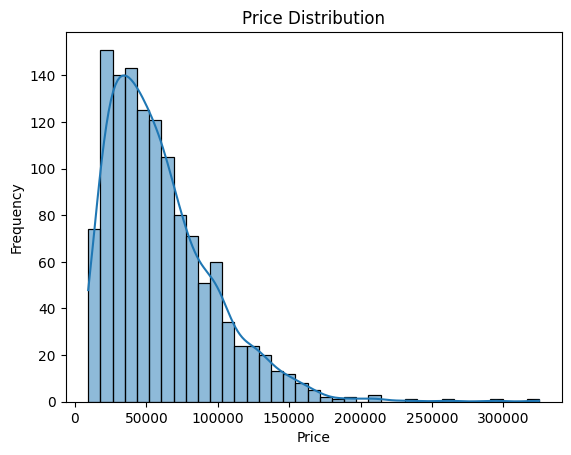

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


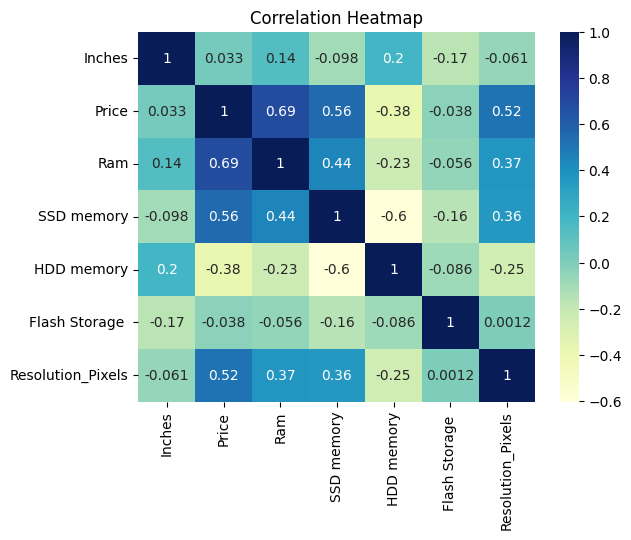

In [ ]:
# Correlation between numeric columns
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()


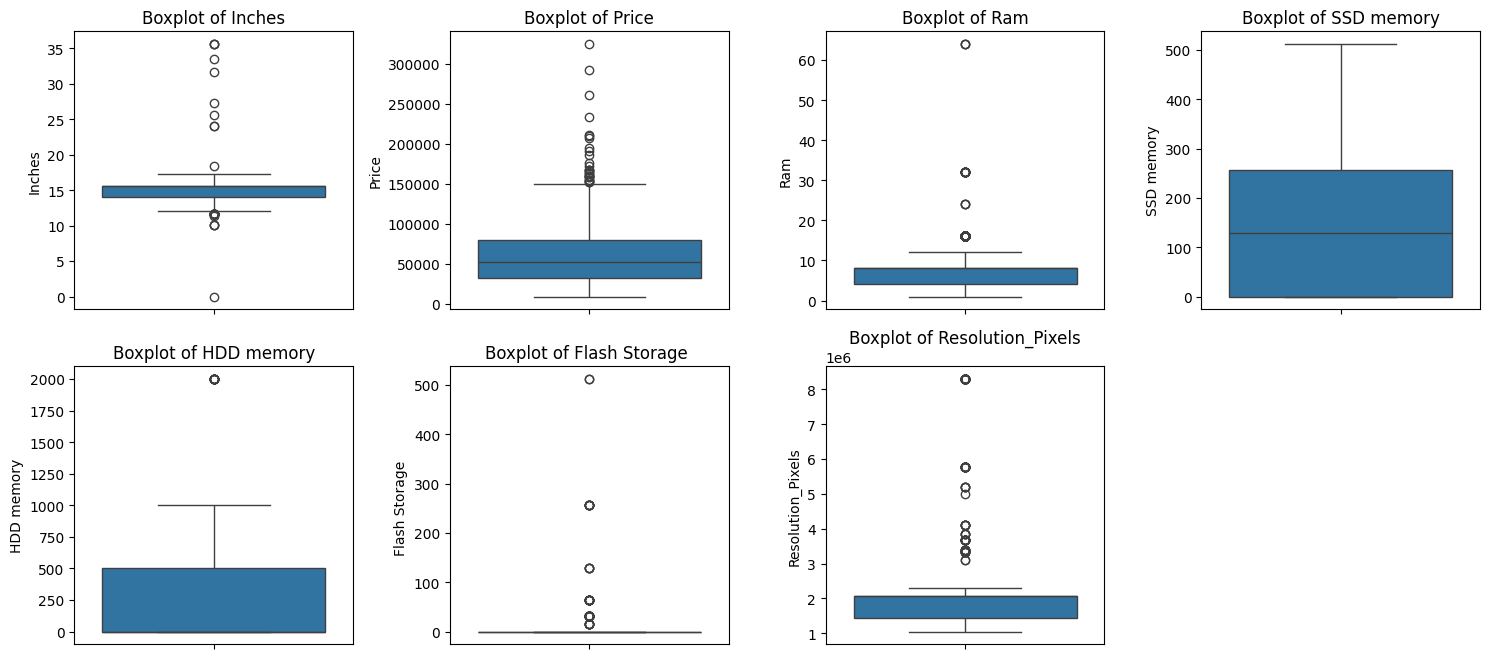

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numeric columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots to visually detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)  # Adjust subplot grid if you have more/less columns
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols_to_encode = ['Company', 'TypeName', 'OpSys', 'CPU_Brand', 'CPU_Type', 'GPU_Brand']

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])


In [ ]:
df.head()


Company  TypeName  Inches  OpSys Weight        Price  Ram  SSD memory  \
0        1         4    13.3      8   1.37   71378.6832    8         128   
1        1         4    13.3      8   1.34   47895.5232    8           0   
2        7         3    15.6      4   1.86   30636.0000    8         256   
3        1         4    15.4      8   1.83  135195.3360   16         512   
4        1         4    13.3      8   1.37   96095.8080    8         256   

   HDD memory  Flash Storage   Resolution_Pixels  CPU_Brand  CPU_Type  \
0           0               0          4096000.0          1         2   
1           0             128          1296000.0          1         2   
2           0               0          2073600.0          1         2   
3           0               0          5184000.0          1         3   
4           0               0          4096000.0          1         2   

   GPU_Brand  
0          2  
1          2  
2          2  
3          0  
4          2

In [ ]:
# Find rows where any column has a '?'
df[df.isin(['?']).any(axis=1)]


Company  TypeName  Inches  OpSys Weight     Price  Ram  SSD memory  \
201        4         4    13.3      5      ?  77202.72    8         256   

     HDD memory  Flash Storage   Resolution_Pixels  CPU_Brand  CPU_Type  \
201           0               0          2073600.0          1         3   

     GPU_Brand  
201          2

In [ ]:
# Drop all rows with '?' values
df = df[~df.isin(['?']).any(axis=1)]


In [ ]:
from sklearn.model_selection import train_test_split

# 1. Split features and target
X = df.drop('Price', axis=1)
y = df['Price']

# 2. Create training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Confirm the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1017, 13)
X_test shape: (255, 13)
y_train shape: (1017,)
y_test shape: (255,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 2. Predict on test data
y_pred = model.predict(X_test_scaled)

# 3. Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 4. Print results
print("Linear Regression Results:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 2))


Linear Regression Results:
MAE: 15527.76
RMSE: 20624.1
R² Score: 0.63


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("Random Forest Results:")
print("MAE:", round(mae_rf, 2))
print("RMSE:", round(rmse_rf, 2))
print("R² Score:", round(r2_rf, 2))


Random Forest Results:
MAE: 10217.8
RMSE: 16288.93
R² Score: 0.77


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Create and train the model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)

# 2. Predict on test data
y_pred_gb = gb_model.predict(X_test_scaled)

# 3. Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# 4. Print results
print("Gradient Boosting Regressor Results:")
print("MAE:", round(mae_gb, 2))
print("RMSE:", round(rmse_gb, 2))
print("R² Score:", round(r2_gb, 2))


Gradient Boosting Regressor Results:
MAE: 10742.28
RMSE: 15997.9
R² Score: 0.78


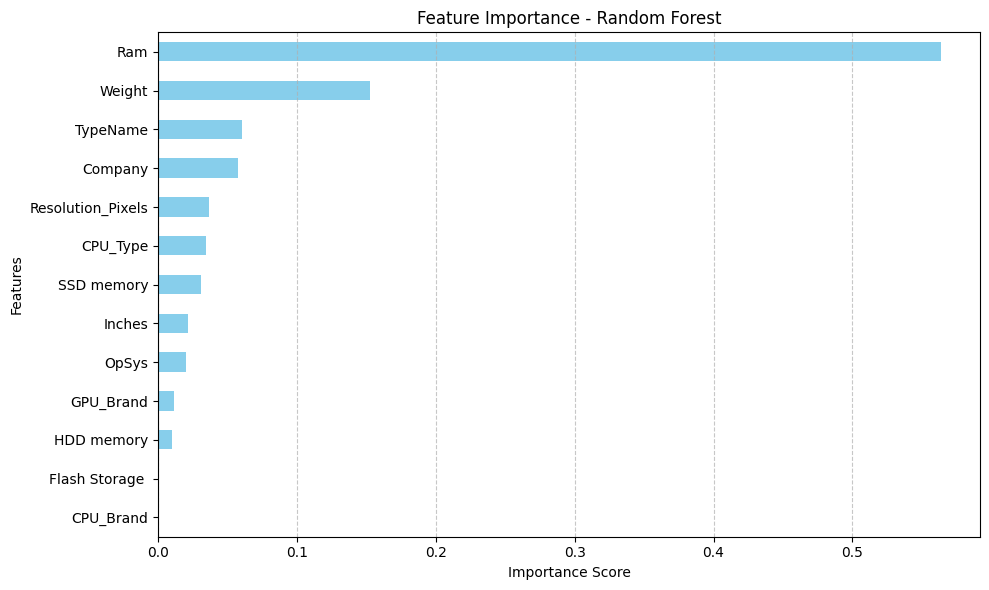

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances from the model
importances = rf_model.feature_importances_   # 'rf_model' is your trained RandomForestRegressor
feature_names = X_train.columns               # X_train should contain your final feature columns

# Create a DataFrame for better visualization
feat_importances = pd.Series(importances, index=feature_names)

# Sort and plot
plt.figure(figsize=(10, 6))
feat_importances.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
